In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(['area_type', 'availability', 'society','balcony'], axis = 1, inplace = True)

In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [16]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df1 = df.drop('size', axis = 1)

In [18]:
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [19]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df1[df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [23]:
df1.shape

(13246, 5)

In [24]:
df1[~df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [25]:
df1[~df1['total_sqft'].apply(is_float)].head(12)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [26]:
def convert(x):
    l = x.split(' - ')
    if len(l) == 2:
        return(float(l[0]) + (float(l[1])) / 2)
    try:
        return float(x)
    except:
        return None

In [27]:
df2 = df1.copy()

In [28]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [29]:
df2['total_sqft'] = df2['total_sqft'].apply(convert)

In [30]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [39]:
df2['price_per_sqft'] = (df2['price']*10000)/df2['total_sqft']

In [42]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000


In [43]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1563.466767,2.692586,112.389392,2.801902,7.903582e+02
std,1246.451554,1.341506,149.076587,1.295758,1.067277e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.237918e+02
50%,1277.000000,2.000000,72.000000,3.000000,5.417545e+02
75%,1680.000000,3.000000,120.000000,3.000000,7.307886e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13246.00000,13246.00000,13246.00000,13200.00000
mean,1563.46677,2.69259,112.38939,2.80190,790.35823
std,1246.45155,1.34151,149.07659,1.29576,10672.76911
min,1.00000,1.00000,8.00000,1.00000,26.78298
25%,1100.00000,2.00000,50.00000,2.00000,423.79182
50%,1277.00000,2.00000,72.00000,3.00000,541.75450
75%,1680.00000,3.00000,120.00000,3.00000,730.78862
max,52272.00000,40.00000,3600.00000,43.00000,1200000.00000


In [37]:
pd.reset_option('display.float_format')

In [38]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1563.466767,2.692586,112.389392,2.801902,7.903582e+02
std,1246.451554,1.341506,149.076587,1.295758,1.067277e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.237918e+02
50%,1277.000000,2.000000,72.000000,3.000000,5.417545e+02
75%,1680.000000,3.000000,120.000000,3.000000,7.307886e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [199]:
df2['price_per_sqft'] = (df2['price']*100000)/df2['total_sqft']

In [200]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [201]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1563.466767,2.692586,112.389392,2.801902,7.903582e+03
std,1246.451554,1.341506,149.076587,1.295758,1.067277e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.237918e+03
50%,1277.000000,2.000000,72.000000,3.000000,5.417545e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.307886e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [202]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [203]:
len(df2.location.unique())

1304

In [204]:
df2.groupby('location')['location'].value_counts()

location              location            
 Anekal                Anekal                 1
 Banaswadi             Banaswadi              1
 Basavangudi           Basavangudi            1
 Bhoganhalli           Bhoganhalli            1
 Devarabeesana Halli   Devarabeesana Halli    6
                                             ..
t.c palya             t.c palya               1
tc.palya              tc.palya                4
vinayakanagar         vinayakanagar           1
white field,kadugodi  white field,kadugodi    1
whitefiled            whitefiled              1
Name: location, Length: 1304, dtype: int64

In [205]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [206]:
less_than_10 = location_stats[location_stats <10]

In [207]:
less_than_10

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [208]:
len(less_than_10)

1051

In [209]:
df2['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [210]:
df2['location'] = df2['location'].apply(lambda x :str(x))

In [211]:
df2['location'] = df2['location'].apply(lambda x : x.strip())

In [212]:
df2['location'] = df2['location'].apply(lambda x : 'Others' if x in less_than_10 else x)

In [213]:
df2['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      Others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [214]:
df2.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
Others                 2716
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
                       ... 
Banasawadi,               1
JP nagar 9th Phase,       1
Panathur Road,            1
Bellandur,                1
Banaswadi,                1
Name: location, Length: 283, dtype: int64

In [215]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1563.466767,2.692586,112.389392,2.801902,7.903582e+03
std,1246.451554,1.341506,149.076587,1.295758,1.067277e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.237918e+03
50%,1277.000000,2.000000,72.000000,3.000000,5.417545e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.307886e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [216]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [217]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13246.00000,13246.00000,13246.00000,13200.00000
mean,1563.46677,2.69259,112.38939,2.80190,7903.58229
std,1246.45155,1.34151,149.07659,1.29576,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,72.00000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [218]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [219]:
df2[df2.total_sqft/ df2.bhk <300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Others,1020.00000,6.00000,370.00000,6,36274.50980
45,HSR Layout,600.00000,9.00000,200.00000,8,33333.33333
58,Murugeshpalya,1407.00000,4.00000,150.00000,6,10660.98081
68,Others,1350.00000,7.00000,85.00000,8,6296.29630
70,Others,500.00000,3.00000,100.00000,3,20000.00000
...,...,...,...,...,...,...
13277,Others,1400.00000,7.00000,218.00000,7,15571.42857
13279,Others,1200.00000,5.00000,130.00000,6,10833.33333
13281,Margondanahalli,1375.00000,5.00000,125.00000,5,9090.90909
13303,Vidyaranyapura,774.00000,5.00000,70.00000,5,9043.92765


In [220]:
df3 = df2[~(df2.total_sqft/ df2.bhk <300)]

In [221]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [222]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.00000,12502.00000,12502.00000,12502.00000,12456.00000
mean,1598.84155,2.56479,111.31192,2.65070,6290.29998
std,1269.66090,1.08495,152.08997,0.98170,4175.61921
min,300.00000,1.00000,9.00000,1.00000,267.82981
25%,1118.00000,2.00000,49.00000,2.00000,4186.72584
50%,1300.00000,2.00000,70.00000,3.00000,5281.69014
75%,1702.25000,3.00000,115.00000,3.00000,6904.65201
max,52272.00000,16.00000,3600.00000,16.00000,176470.58824


In [223]:
import numpy as np

In [224]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-s)) & (subdf.price_per_sqft < (m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [225]:
df4 = remove_pps_outliers(df3)

In [226]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [227]:
df4.shape

(10176, 6)

In [228]:
import matplotlib.pyplot as plt
import matplotlib

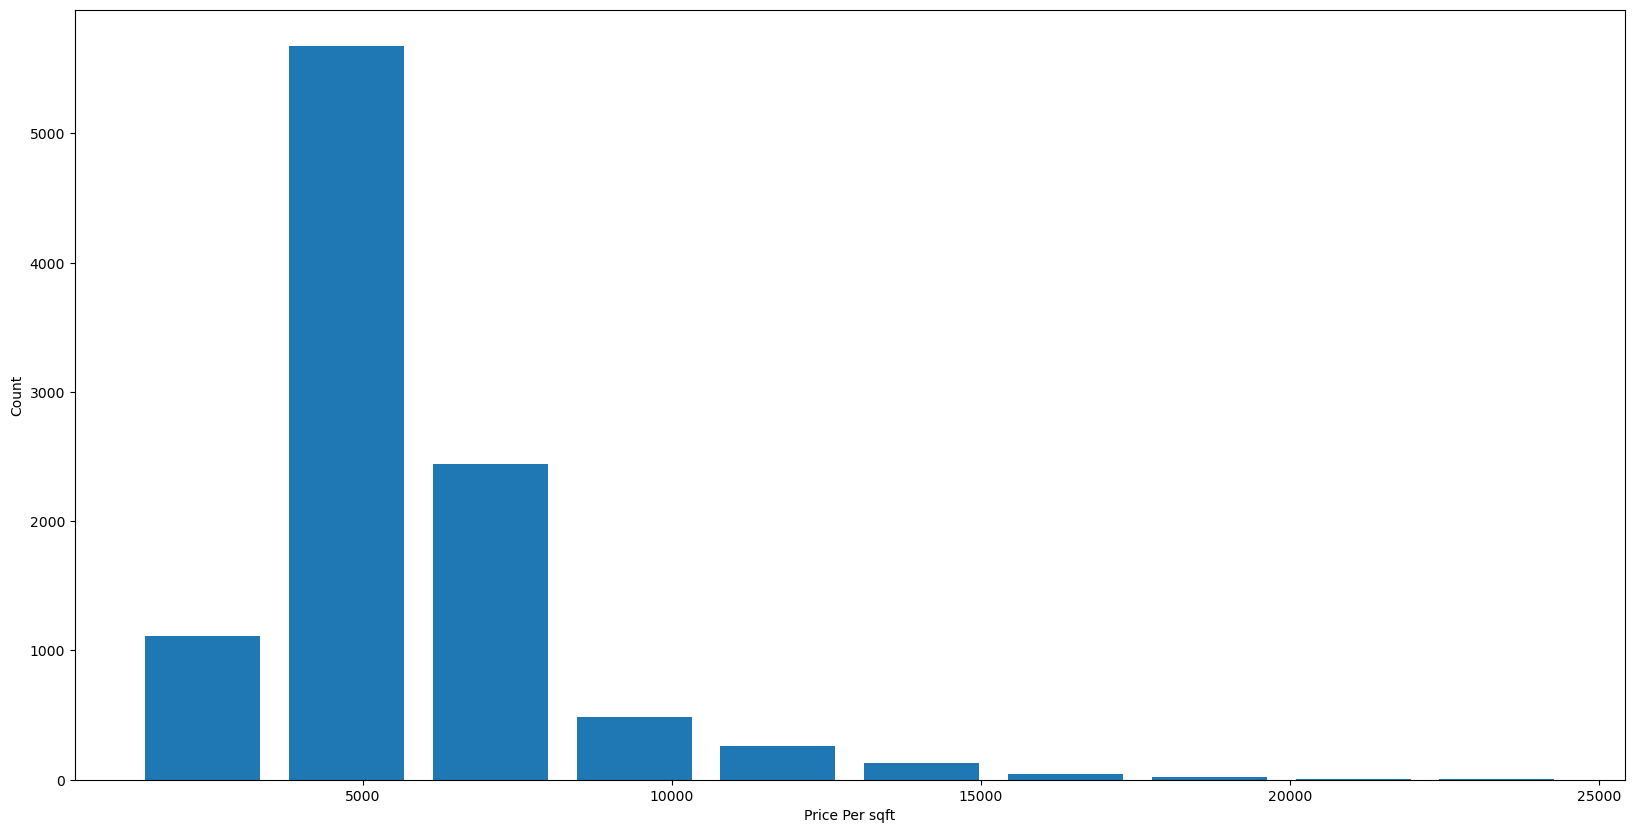

In [229]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df4.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
plt.show()

In [230]:
df4['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [231]:
df4.head(25)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567
5,1st Block Jayanagar,2750.00000,4.00000,413.00000,4,15018.18182
6,1st Block Jayanagar,2450.00000,4.00000,368.00000,4,15020.40816
7,1st Block Koramangala,1415.00000,2.00000,110.00000,2,7773.85159
8,1st Block Koramangala,860.00000,2.00000,65.50000,2,7616.27907
9,1st Block Koramangala,3000.00000,3.00000,300.00000,4,10000.00000


In [232]:
df4.shape

(10176, 6)

In [233]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'Blue', label = '2BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', label = '3BHK', marker = '*')
    plt.xlabel('Total Sqft')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()
    

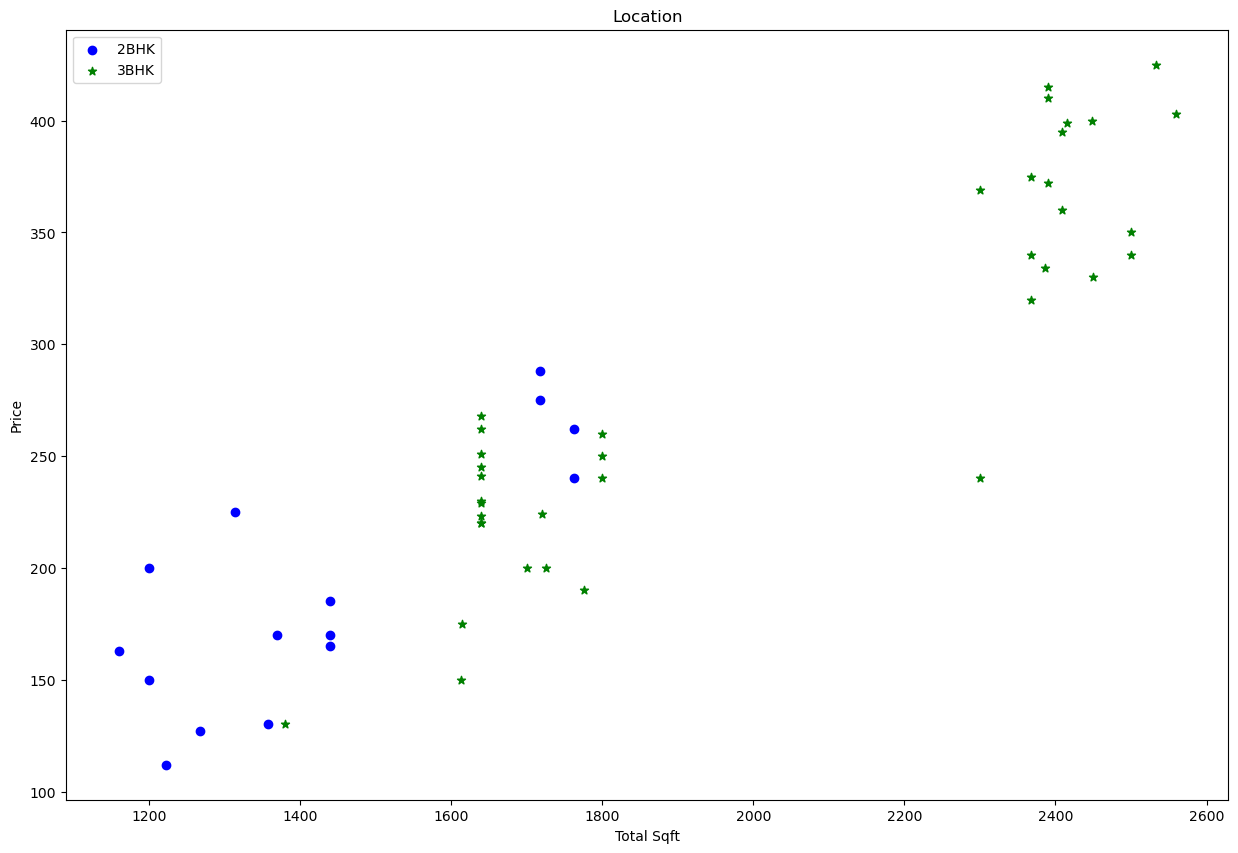

In [234]:
plot_scatter_plot(df4, 'Rajaji Nagar')

In [235]:
df4[df4.bath > df4.bhk + 2] 

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.00000,14.00000,500.00000,9,15151.51515
1641,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5295,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
5890,Others,11338.00000,9.00000,1000.00000,6,8819.89769
8949,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433


In [236]:
df5 = df4[df4.bath <= df4.bhk + 2] 

In [237]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [238]:
def remove_bhk_outliers(df):
    exclude_indice = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count' : bhk_df.shape[0]
        }
        
    for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk - 1)
        if stats and stats['count'] > 5:
            exclude_indice = np.append(exclude_indice, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indice, axis = 'index')

In [239]:
remove_bhk_outliers(df5)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567
...,...,...,...,...,...,...
10166,Yeshwanthpur,1692.00000,3.00000,108.00000,3,6382.97872
10168,Yeshwanthpur,2500.00000,5.00000,185.00000,6,7400.00000
10170,Yeshwanthpur,1160.00000,2.00000,64.08000,2,5524.13793
10173,Yeshwanthpur,1855.00000,3.00000,135.00000,3,7277.62803


In [240]:
df5.drop('price_per_sqft', axis = 1, inplace = True)

C:\Users\praja\AppData\Local\Temp\ipykernel_20568\3739651139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop('price_per_sqft', axis = 1, inplace = True)


In [241]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2


In [242]:
final = pd.get_dummies(data = df5, columns=['location'], drop_first=True)

In [243]:
final.head()

,total_sqft,bath,price,bhk,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.00000,4.00000,428.00000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00000,3.00000,194.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00000,2.00000,235.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.00000,2.00000,130.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.00000,2.00000,148.00000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now will separate output and input

In [244]:
X = final.drop('price', axis =1)

In [245]:
y = final.price

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [248]:
X_train.shape

(8136, 262)

In [249]:
X_test.shape

(2035, 262)

In [250]:
from sklearn.linear_model import LinearRegression

In [251]:
model = LinearRegression()

In [252]:
model.fit(X_train, y_train)

LinearRegression()

In [258]:
model.score(X_test, y_test)

0.7502112603528353

In [253]:
y_pred = model.predict(X_test)

In [254]:
y_pred[:5]

array([149.75819514,  57.64735196, 177.32285955, 119.7106159 ,
       142.05229003])

In [255]:
import seaborn as sns

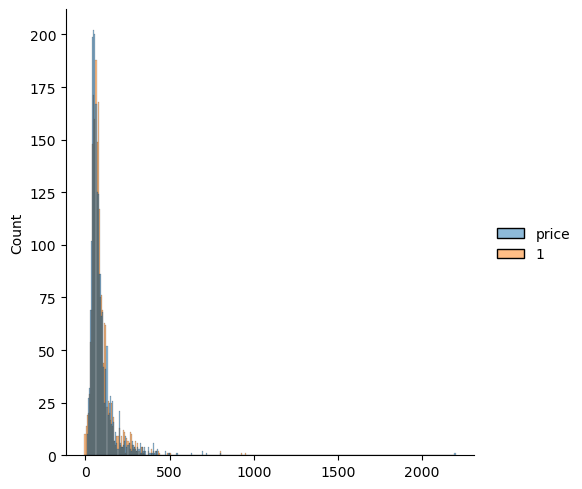

In [260]:
sns.displot((y_test, y_pred))
plt.show()